### 서울특별시 범죄현황 통계자료 전처리 (df -> gu_df)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#font 
from matplotlib import font_manager, rc

%matplotlib inline 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
# 엑셀 파일 읽기
df = pd.read_excel('관서별 5대범죄 발생 및 검거.xlsx', encoding='utf-8')
type(df)
# df.head(3)

pandas.core.frame.DataFrame

In [5]:
# 관서명: 구별(지역구명)
police_to_gu = {'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}

df['구별'] = df['관서명'].apply(lambda x: police_to_gu.get(x, '구 없음'))
# get(key, 'key가 없을 때 value') 해당 키가 없어도 에러 x

df.head(3)

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356,구 없음
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구


In [6]:
# 구별 피벗테이블 생성 (관서명 -> 구 별 합계 계산)
gu_df = pd.pivot_table(df, index = '구별', aggfunc = np.sum)
gu_df.head(3)

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649


In [7]:
# '구 없음' 제거
# drop([열 이름 리스트])
gu_df = gu_df.drop(['구 없음'])
gu_df.head(3)

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649


In [8]:
# 검거율 계산
gu_df['강간검거율'] = gu_df['강간(검거)'] / gu_df['강간(발생)'] * 100
gu_df['강도검거율'] = gu_df['강도(검거)'] / gu_df['강도(발생)'] * 100
gu_df['살인검거율'] = gu_df['살인(검거)'] / gu_df['살인(발생)'] * 100
gu_df['절도검거율'] = gu_df['절도(검거)'] / gu_df['절도(발생)'] * 100
gu_df['폭력검거율'] = gu_df['폭력(검거)'] / gu_df['폭력(발생)'] * 100
gu_df['검거율'] = gu_df['소계(검거)'] / gu_df['소계(발생)'] * 100

In [10]:
# 검거된 범죄수 열 제거
# list - del dict[key]
del gu_df['강간(검거)']
del gu_df['강도(검거)']
del gu_df['살인(검거)']
del gu_df['절도(검거)']
del gu_df['폭력(검거)']
del gu_df['소계(발생)']
del gu_df['소계(검거)']

gu_df.head(3)

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615


In [15]:
# 100 초과인 검거율 100으로 고정

gu_df[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] # -> 해당 열 series들 출력
gu_df[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100 # -> bool값으로 출력
# true인 값만 출력
gu_df[gu_df[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100] = 100
gu_df.head(3)

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615


In [16]:
# 컬럼명 변경

# rename(columns = {기존 컬럼명: 새 컬럼명, ...}, inplace = )
# inplace - true (덮어쓰기 허용) / false(default, 덮어쓰기 x)
gu_df.rename(columns = {'강간(발생)':'강간',
                        '강도(발생)':'강도',
                        '살인(발생)':'살인',
                        '절도(발생)':'절도',
                        '폭력(발생)':'폭력'
                       }, inplace = True)
gu_df.head(3)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615


---

### 서울 구별 인구수(popul_df)와 JOIN

In [17]:
# index_col 옵션으로 인덱스 열 선택하여 파일 open
popul_df = pd.read_csv('pop_kor.csv', encoding = 'UTF-8', index_col = '구별')
popul_df.head(3)

,인구수
구별,
강남구,581760
강동구,463321
강북구,334426


---
#### #1. A.join(B)
A & B 데이터프레임의 index col이 동일해야함

In [19]:
# gu_df(구별 범죄현황 통계자료) - popul_df(인구수) JOIN
# 인덱스열이 같을 때
gu_df = gu_df.join(popul_df)
gu_df.head(3)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426


---
#### #2. pd.mearge(A, B, left_on = "A_index", right_on = "B_index", how = "join_type")
A와 B의 인덱스 열이 다를때 기준이 될 열 지정하여 merge

In [ ]:
# merge
gu_df = pd.merge(gu_df, popul_df, left_on = '구별', right_on = '구별', how = 'inner')

---

### 데이터 살펴보기

In [20]:
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,595691
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031


In [ ]:
# sort_values(by = '열 이름', ascending = T / F, inplace = T / F)
# - ascending T 오름차순 / F 내림차순
# - inplace T 덮어쓰기 o / F 덮어쓰기 x

In [25]:
# 검거율(값) 기준으로 오름차순 정렬하기

gu_df.sort_values(by = '검거율', ascending = True, inplace = True)
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031
동작구,285,9,5,1865,1910,48.771930,55.555556,100.000000,35.442359,83.089005,58.836524,412774
중구,170,9,3,2548,2224,65.294118,66.666667,66.666667,33.712716,88.309353,59.386354,134329
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
영등포구,295,22,14,2964,3572,62.033898,90.909091,85.714286,32.995951,82.894737,60.492209,417811


In [26]:
# 검거율(값) 기준으로 내림차순 정렬하기

gu_df.sort_values(by = '검거율', ascending = False, inplace = True)
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강서구,262,13,7,2096,3207,72.900763,100.000000,100.0,60.114504,84.752105,75.022381,595691
금천구,151,6,3,1567,2054,80.794702,100.000000,100.0,56.668794,86.465433,73.948691,256167
강북구,153,14,7,1434,2649,82.352941,92.857143,100.0,43.096234,88.637222,73.126615,334426
도봉구,102,9,3,1063,1487,100.000000,100.000000,100.0,44.967074,87.626093,71.321321,353241
동대문구,173,13,5,1981,2548,84.393064,100.000000,100.0,41.090358,87.401884,67.902542,373824


In [29]:
# 5대 범죄 열
crime_list = ['강간', '강도', '살인', '절도', '폭력']
gu_df[crime_list]

,강간,강도,살인,절도,폭력
구별,,,,,
강서구,262,13,7,2096,3207
금천구,151,6,3,1567,2054
강북구,153,14,7,1434,2649
도봉구,102,9,3,1063,1487
동대문구,173,13,5,1981,2548
은평구,166,9,3,1914,2653
강남구,449,21,13,3850,4284
성북구,150,5,5,1785,2209
중랑구,187,11,13,2135,2847


---

### heatmap 차트

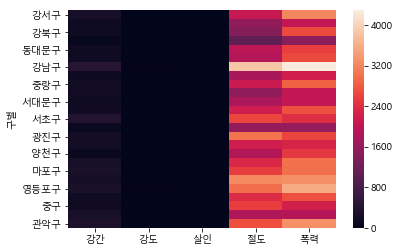

In [30]:
sns.heatmap(gu_df[crime_list])

---

### 각 범죄별 발생 건수 정규화 (crime_count_norm)

각 5대 범죄별 수치를 해당 범죄의 최대값으로 나눠줌

In [32]:
# 각 범죄별 최고치
weight_col = gu_df[crime_list].max()
weight_col

강간     449
강도      22
살인      14
절도    3850
폭력    4284
dtype: int64

In [34]:
crime_count_norm = gu_df[crime_list] / weight_col
crime_count_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강서구,0.583519,0.590909,0.500000,0.544416,0.748599
금천구,0.336303,0.272727,0.214286,0.407013,0.479458
강북구,0.340757,0.636364,0.500000,0.372468,0.618347
도봉구,0.227171,0.409091,0.214286,0.276104,0.347106
동대문구,0.385301,0.590909,0.357143,0.514545,0.594771


---

### 차트 다듬기

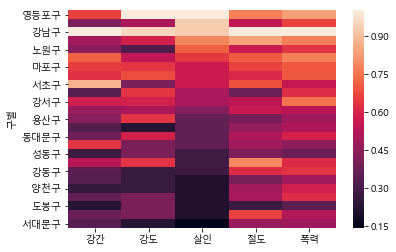

In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# 살인 수 내림차순으로 정렬
sns.heatmap(crime_count_norm.sort_values(by = '살인', ascending = False))

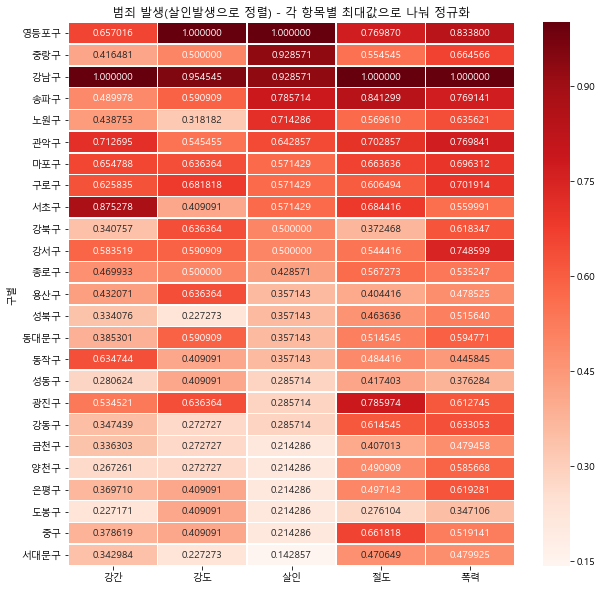

In [36]:
# 전체 figure 사이즈 조정 (기본으로 실행됨으로 생략가능하나 크기 조정 시 필수)
plt.figure(figsize = (10, 10))

# 살인, 오름차순, 수치 입력, 소숫점(float), 넓이 지정, 색상 지정
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='Reds')
plt.title('범죄 발생(살인발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()

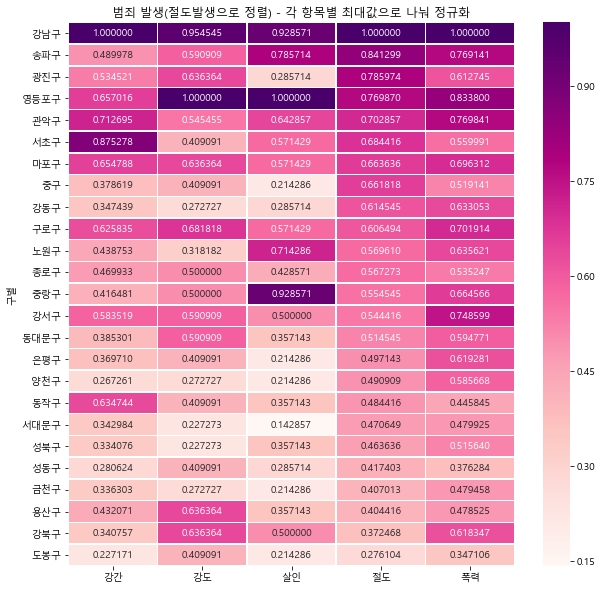

In [37]:
# 절도 기준으로 살펴보기

plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='절도', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='RdPu')

plt.title('범죄 발생(절도발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()

---

### 인구수 대비 발생비율 살펴보기

In [38]:
crime_count_norm.head() # gu_df의 5대 범죄 열만

,강간,강도,살인,절도,폭력
구별,,,,,
강서구,0.583519,0.590909,0.500000,0.544416,0.748599
금천구,0.336303,0.272727,0.214286,0.407013,0.479458
강북구,0.340757,0.636364,0.500000,0.372468,0.618347
도봉구,0.227171,0.409091,0.214286,0.276104,0.347106
동대문구,0.385301,0.590909,0.357143,0.514545,0.594771


In [39]:
gu_df.head() # 5대 범죄 수, 검거율, 인구 수

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,
강서구,262,13,7,2096,3207,72.900763,100.000000,100.0,60.114504,84.752105,75.022381,595691
금천구,151,6,3,1567,2054,80.794702,100.000000,100.0,56.668794,86.465433,73.948691,256167
강북구,153,14,7,1434,2649,82.352941,92.857143,100.0,43.096234,88.637222,73.126615,334426
도봉구,102,9,3,1063,1487,100.000000,100.000000,100.0,44.967074,87.626093,71.321321,353241
동대문구,173,13,5,1981,2548,84.393064,100.000000,100.0,41.090358,87.401884,67.902542,373824


In [40]:
# div(값, axis = 0 / 1)
# - 0(default) 열 방향 연산
# - 1 행 방향 연산

# 행(구) 별로 구별 범죄 수(max 대비 비율값) / 구별 인구 수 * 100000(인구수 단위)
crime_ratio = crime_count_norm.div(gu_df['인구수'], axis = 0) * 100000 
crime_ratio.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강서구,0.097957,0.099197,0.083936,0.091392,0.125669
금천구,0.131283,0.106465,0.083651,0.158886,0.187166
강북구,0.101893,0.190285,0.149510,0.111375,0.184898
도봉구,0.064311,0.115811,0.060663,0.078163,0.098263
동대문구,0.103070,0.158071,0.095538,0.137644,0.159105


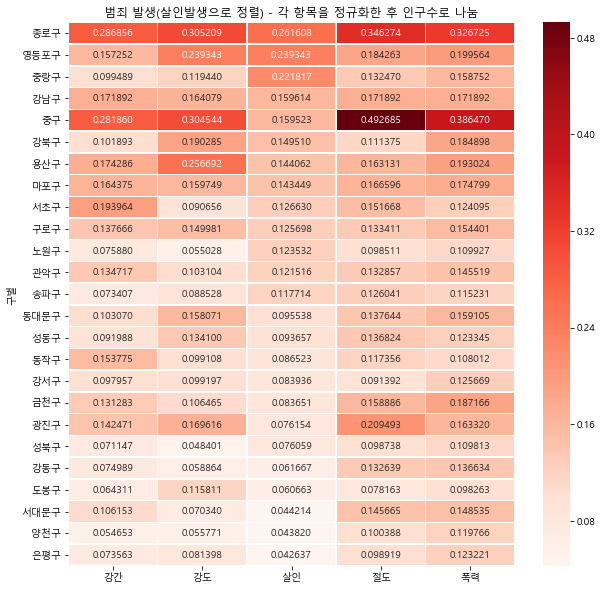

In [42]:
# [인구수 대비] 구별 살인 발생 순위

plt.figure(figsize = (10,10))

sns.heatmap(crime_ratio.sort_values(by = '살인', ascending = False), annot = True, fmt = 'f', linewidths = .5, cmap = 'Reds')
plt.title('범죄 발생(살인발생으로 정렬) - 각 항목을 정규화한 후 인구수로 나눔')
plt.show()

---

### 인구 수 대비 구별 5대 범죄 발생 수치 전체 평균

In [43]:
crime_ratio.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강서구,0.097957,0.099197,0.083936,0.091392,0.125669
금천구,0.131283,0.106465,0.083651,0.158886,0.187166
강북구,0.101893,0.190285,0.149510,0.111375,0.184898
도봉구,0.064311,0.115811,0.060663,0.078163,0.098263
동대문구,0.103070,0.158071,0.095538,0.137644,0.159105


In [44]:
crime_ratio.mean(axis = 0) # default 열 방향의 mean - 5대 범죄 별

강간    0.128756
강도    0.136951
살인    0.117701
절도    0.156691
폭력    0.161926
dtype: float64

In [45]:
crime_ratio.mean(axis = 1) # 행 방향 - 구별

구별
강서구     0.099630
금천구     0.133490
강북구     0.147592
도봉구     0.083442
동대문구    0.130686
은평구     0.083948
강남구     0.167874
성북구     0.080832
중랑구     0.146394
용산구     0.186239
서대문구    0.102981
노원구     0.092575
서초구     0.137403
성동구     0.115983
광진구     0.152211
종로구     0.305334
양천구     0.074880
구로구     0.140231
마포구     0.161793
송파구     0.104184
영등포구    0.203953
강동구     0.092958
중구      0.325016
동작구     0.112955
관악구     0.127543
dtype: float64

In [47]:
# 각 구별 전체 범죄 발생 비율 평균 열 추가
crime_ratio['전체발생비율'] = crime_ratio.mean(axis = 1)
crime_ratio.head()

,강간,강도,살인,절도,폭력,전체발생비율
구별,,,,,,
강서구,0.097957,0.099197,0.083936,0.091392,0.125669,0.099630
금천구,0.131283,0.106465,0.083651,0.158886,0.187166,0.133490
강북구,0.101893,0.190285,0.149510,0.111375,0.184898,0.147592
도봉구,0.064311,0.115811,0.060663,0.078163,0.098263,0.083442
동대문구,0.103070,0.158071,0.095538,0.137644,0.159105,0.130686


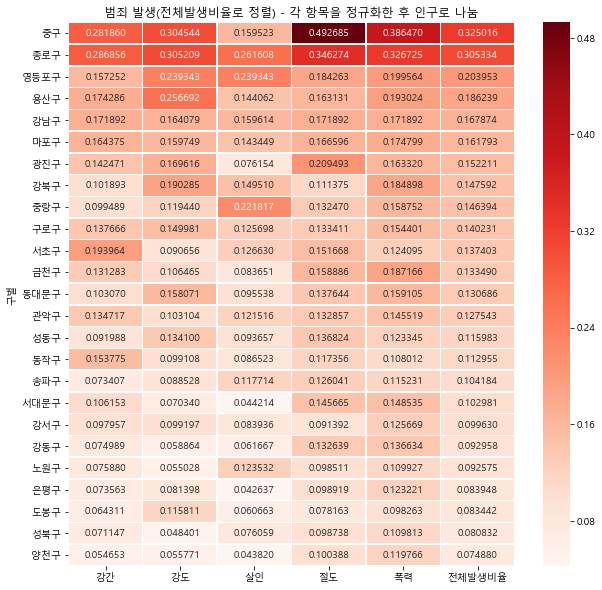

In [48]:
# 차트
plt.figure(figsize = (10,10))

sns.heatmap(crime_ratio.sort_values(by = '전체발생비율', ascending = False),
            annot=True, fmt='f', linewidths=.5, cmap='Reds')

plt.title('범죄 발생(전체발생비율로 정렬) - 각 항목을 정규화한 후 인구로 나눔')
plt.show()